In [2]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def feature_normalize(X):
    '''
    This function is used to normarize the feature values.
    X = array of features
    X_norm = normalized X
    mu = mean of features
    sigma = standard deviation
    '''
    X_norm = X
    mu = []
    sigma = []
    
    for i in range(X.shape[1]):
        m = X_norm[:,i].mean()
        s = X_norm[:,i].std()
        
        mu.append(m)
        sigma.append(s)
        
        X_norm[:,i] = (X_norm[:,i] - m)/s
        
    return X_norm, np.array(mu).reshape(1, X.shape[1]), np.array(sigma).reshape(1,X.shape[1])

In [4]:
def compute_cost(X,Y,theta):
    '''
    This is used to compute cost function of linear regression 
    m = number of training examples
    n = number of features
    X = shape = (m,n+1)
    Y = shape = (m,1)
    theta = parameter matrix (n+1,1)
    j_theta = cost function
    
    '''
    m = X.shape[0]
    
    h_x = np.dot(X,theta)
    j_theta = (1/2*m) * np.sum((h_x - Y)**2)
    
    return j_theta

In [5]:
def gradient_descent(X,Y,theta,alpha,num_iters):
    
    '''
    This is used to compute gradient descent, which is 
    used to minimize the cost function (j_theta).
    
    m = number of training examples
    n = number of features
    X = shape = (m,n+1)
    Y = shape = (m,1)
    theta = parameter matrix (n+1,1)
    num_iters = number of iterations
    alpha = learning rate (+ve values only)
    
    '''
    
    m = X.shape[0]
    
    J_hystory = np.zeros((num_iters, 1))
    for i in range(num_iters):
        
        for j in range(theta.size):
            error = np.dot(X,theta) - Y
            theta[j][0] = theta[j][0] - (alpha /m ) * np.sum(error * X[:,j].reshape(m,1))
        
        # recent j_theta value = J_hystory
        J_hystory[i,0] =  compute_cost(X,Y,theta)/10000
    return theta,J_hystory

STARTING ALGORITHAM....
coefficients found by gradient descent :  [[338658.2492493 ]
 [103857.9363055 ]
 [ -1143.58125322]]
predicted price for 1650 sq.ft and 3 bedroom house is :  [292591.61055057]


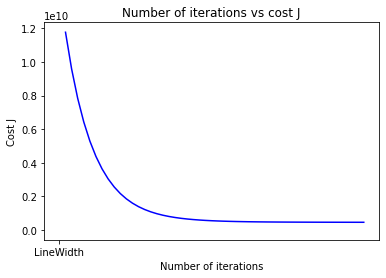

In [6]:
# importing the dataset
data = np.loadtxt('housing_prices.txt', delimiter=',')

print('STARTING ALGORITHAM....')

X = data[:,0:2]
Y = data[:,2:]

# initilizing parameters
theta = np.zeros((3,1))

m = X.shape[0]

#feature normalizing
x, mu, sigma = feature_normalize(X)

X_norm = np.ones((m, 3))
X_norm[:, 1:3] = x

#initializing parameters
iterations = 50
alpha = 0.1

# computing gradient descent 
theta,J_hystory = gradient_descent(X_norm,Y,theta,alpha,iterations)
print('coefficients found by gradient descent : ', theta)

#predicting the price of given value
a = np.array([1,(1650-mu[0][0])/sigma[0][0],(3-mu[0][1])/sigma[0][1]])
predicted_price = np.dot(a,theta)
print("predicted price for 1650 sq.ft and 3 bedroom house is : ", predicted_price)


# checking gradient descent algoritham is working or not
plt.plot(range(1,len(J_hystory)+1), J_hystory, '-b', 'LineWidth', 2);
plt.title('Number of iterations vs cost J')
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');